In [ ]:
from numpy import unique, argmax
import tensorflow as tf
from tensorflow.keras.datasets.mnist import  load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2


In [ ]:
(x_train,y_train),(x_test,y_test) = load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

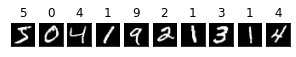

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(10):
  ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])
  

In [ ]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
#defining the model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
x=model.fit(x_train,y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

model.save('handwritten.model')


Epoch 1/10
422/422 - 47s - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0303 - val_accuracy: 0.9930 - 47s/epoch - 112ms/step
Epoch 2/10
422/422 - 45s - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0298 - val_accuracy: 0.9917 - 45s/epoch - 106ms/step
Epoch 3/10
422/422 - 45s - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0303 - val_accuracy: 0.9925 - 45s/epoch - 106ms/step
Epoch 4/10
422/422 - 45s - loss: 0.0189 - accuracy: 0.9935 - val_loss: 0.0267 - val_accuracy: 0.9942 - 45s/epoch - 106ms/step
Epoch 5/10
422/422 - 48s - loss: 0.0171 - accuracy: 0.9943 - val_loss: 0.0308 - val_accuracy: 0.9920 - 48s/epoch - 113ms/step
Epoch 6/10
422/422 - 45s - loss: 0.0150 - accuracy: 0.9946 - val_loss: 0.0295 - val_accuracy: 0.9927 - 45s/epoch - 106ms/step
Epoch 7/10
422/422 - 45s - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0279 - val_accuracy: 0.9932 - 45s/epoch - 107ms/step
Epoch 8/10
422/422 - 45s - loss: 0.0138 - accuracy: 0.9951 - val_loss: 0.0255 - val_accuracy: 0.9925 - 45s/epoch - 107

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.37000274658203


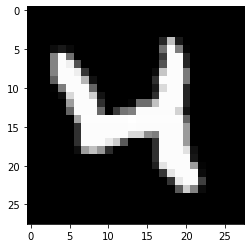

In [ ]:
image = x_train[20]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [ ]:
image = image.reshape(1,image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted : {}'.format(argmax(p)))


1/1 [==============================] - 0s 68ms/step
Predicted : 4


1/1 [==============================] - 0s 115ms/step
This digit is probably a 0


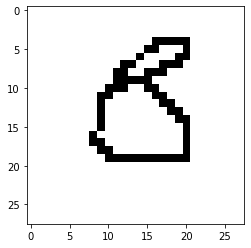

1/1 [==============================] - 0s 25ms/step
This digit is probably a 7


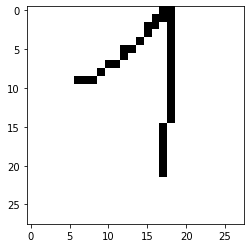

1/1 [==============================] - 0s 23ms/step
This digit is probably a 3


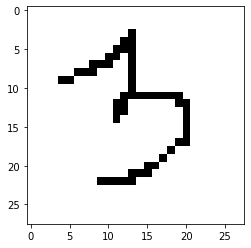

1/1 [==============================] - 0s 22ms/step
This digit is probably a 5


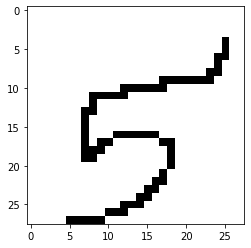

1/1 [==============================] - 0s 23ms/step
This digit is probably a 9


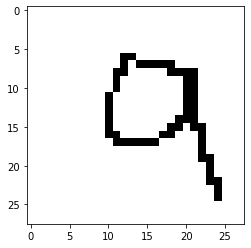

313/313 [==============================] - 4s 13ms/step - loss: 0.0233 - accuracy: 0.9937
[0.023349173367023468, 0.9937000274658203]


In [ ]:
model = tf.keras.models.load_model('handwritten.model')

image_number = 1

while os.path.isfile(f"digit{image_number}.png"):
    try :
      img = cv2.imread(f"digit{image_number}.png")[:,:,0]
      img = np.invert(np.array([img]))
      prediction = model.predict(img)
      print(f"This digit is probably a {np.argmax(prediction)}")
      plt.imshow(img[0], cmap=plt.cm.binary)
      plt.show()
    except:
      print("Error!") 
    finally :
      image_number +=1 
  
loss = model.evaluate(x_test, y_test)
# accuracy = model.evaluate(x_test, y_test)

print(loss)
# print(accuracy_score)